# Scikit-Learn Mini Project 1
***
We are going to make predictions models about presence of heart disease in the patients.

Dataset contains this columns with data:
> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 1 = normal; 2 = fixed defect; 3 = reversable defect based on data of various patients. 
> 14. "target": 0 = no presence of heart disease; 1 = presence of heart disease

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

Our dataset is small and already clean, so it won't take much time to pre-process data.

In [2]:
heart=pd.read_csv("Data/x-heart.csv")
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


Also there are no NaN values in data.

In [4]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In our dataset we have 165 patients with presence of heart disease and 138 patients with no presence of heart disease.

In [5]:
heart["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

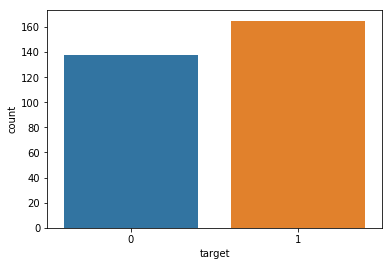

In [6]:
sns.countplot(heart["target"])

Now, we separate the dataset as reposne variable and feature variables.

In [7]:
X=heart.drop("target",axis=1)
y=heart["target"]

We are going to make train and test splitting of data.

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=50)

We can apply standard scaling to get optimized results -> to remove to small or to high results (outlayers)

In [9]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

C:\Users\X\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\X\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\X\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
X_train[:10]

array([[ 0.14977549,  0.69545678,  0.05589963, -0.66555681, -0.15742815,
        -0.39023616,  0.89174012,  1.24027606, -0.7448453 , -0.21406488,
         0.99807145, -0.72335647, -0.51194044],
       [ 1.3258428 , -1.43790388,  1.03199321,  1.23558542,  0.68608582,
        -0.39023616,  0.89174012,  0.97950793, -0.7448453 , -0.8797187 ,
         0.99807145,  0.23688867, -0.51194044],
       [ 2.39499489,  0.69545678, -0.92019395, -0.36850334,  1.24157062,
        -0.39023616, -0.9825655 ,  0.54489436,  1.34256066, -0.8797187 ,
         0.99807145,  2.15737894, -0.51194044],
       [-1.88161349,  0.69545678,  1.03199321, -0.07144987,  0.13060101,
        -0.39023616,  0.89174012,  1.63142827, -0.7448453 ,  2.03251676,
        -2.19294573, -0.72335647, -0.51194044],
       [-1.66778307,  0.69545678, -0.92019395, -0.7843782 , -0.50717784,
        -0.39023616,  0.89174012, -0.41125548, -0.7448453 ,  0.11876203,
        -0.59743714, -0.72335647,  1.17226941],
       [ 0.79126675, -1.437903

Now we can make our prediction models.

We will try with Random Forest Classifier, Support Vector Machine and Neural Network model.

### Random Forest Classifier

In [11]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [12]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.81      0.91      0.86        43

   micro avg       0.83      0.83      0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



In [13]:
print(confusion_matrix(y_test, pred_rfc))

[[24  9]
 [ 4 39]]


### Support Vector Machine

In [14]:
clf=svm.SVC()
clf.fit(X_train, y_train)
pred_clf=clf.predict(X_test)

In [15]:
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.91      0.61      0.73        33
           1       0.76      0.95      0.85        43

   micro avg       0.80      0.80      0.80        76
   macro avg       0.83      0.78      0.79        76
weighted avg       0.82      0.80      0.79        76



In [16]:
print(confusion_matrix(y_test, pred_clf))

[[20 13]
 [ 2 41]]


### Neural Network


In [17]:
mlpc=MLPClassifier(hidden_layer_sizes=(11, 11, 11), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc=mlpc.predict(X_test)

C:\Users\X\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [18]:
print(classification_report(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73        33
           1       0.78      0.84      0.81        43

   micro avg       0.78      0.78      0.78        76
   macro avg       0.77      0.77      0.77        76
weighted avg       0.78      0.78      0.77        76



In [19]:
print(confusion_matrix(y_test, pred_mlpc))

[[23 10]
 [ 7 36]]


## CONCLUSION

In [20]:
from sklearn.metrics import accuracy_score
cm_RFC=accuracy_score(y_test, pred_rfc)
cm_SVM=accuracy_score(y_test, pred_clf)
cm_NN=accuracy_score(y_test, pred_mlpc)

print("Random Forest Classifier have "'{:.2%}'.format(cm_RFC),"accuracy!")
print("Support Vector Machine "'{:.2%}'.format(cm_SVM),"accuracy!")
print("Neural Network have "'{:.2%}'.format(cm_NN),"accuracy!")

Random Forest Classifier have 82.89% accuracy!
Support Vector Machine 80.26% accuracy!
Neural Network have 77.63% accuracy!


We can see that Random Forest Classifier model will have (in most cases) biggest accuracy in prediction of heart disease.


Let's put in test our data (random) to see what will we get.

In [21]:
Xnew = [[27,1,0,120,150,1,0,150,0,2.1,0,2,2]]
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew

array([0], dtype=int64)

So, if we put these data in our model (Random Forest Classifier) we get results that the person with these stats will have no heart disease (0).